# 1. 핵심 인물 찾기
### 데이텀 네트워크 데이터 전체

In [1]:
# 1. 사용자 명단
users = [
    {"id":0, "name":"Hero"},
    {"id":1, "name":"Dunn"},
    {"id":2, "name":"Sue"},
    {"id":3, "name":"Chi"},
    {"id":4, "name":"Thor"},
    {"id":5, "name":"Clive"},
    {"id":6, "name":"Hicks"},
    {"id":7, "name":"Devin"},
    {"id":8, "name":"Kate"},
    {"id":9, "name":"Klein"}
]

# 2. 친구 관계 데이터
friendships = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
              (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

### 사용자 명단에 친구 목록을 추가

In [2]:
for user in users:
    user["friends"] = []
    
for i, j in friendships:
    # users[i]에서 i는 해당 사용자의 id이다.
    users[i]["friends"].append(users[j]) # j를 i의 친구로 추가
    users[j]["friends"].append(users[i]) # i를 j의 친구로 추가

### 네트워크 상에서의 친구 수 - 연결 중심성(degree centrality )
- 평균 친구 수

In [3]:
def number_of_friends(user):
    """user의 친구가 몇 명일까?"""
    return len(user["friends"])

# 전체 친구의 수
total_connections = sum(number_of_friends(user) for user in users)
# 전체 사용자 수
num_users = len(users)

from __future__ import division
avg_connections = total_connections / num_users

avg_connections

2.4

- 친구가 제일 많은 사람
- 친구가 제일 적은 사람

In [4]:
# (user_id, numer_of_friends)로 구성된 list 생성 후, 친구가 많은 순서로 정렬.
num_friends_by_id = [(user["id"], number_of_friends(user)) for user in users]

sorted(num_friends_by_id, key=lambda (user_id, num_friends): num_friends, reverse=True)

[(1, 3),
 (2, 3),
 (3, 3),
 (5, 3),
 (8, 3),
 (0, 2),
 (4, 2),
 (6, 2),
 (7, 2),
 (9, 1)]

# 2. 친구 추천 기능 설계 : 데이터 과학자 추천하기
### 친구의 친구를 추천하기
- 가장 쉽게 생각할 수 있는 알고리즘
- 사용자의 친구에 대해 그 친구의 친구들을 추천하기

In [5]:
def friends_of_friend_ids_bad(user):
    # "foaf"는 침구의 친구를 의미하는 약자
    return [foaf["id"] 
            for friend in user["friends"]  # user의 친구 개개인에 대해
            for foaf in friend["friends"]] # 그들의 친구들을 찾아준다.

friends_of_friend_ids_bad(users[0])

[0, 2, 3, 0, 1, 3]

- 자기 자신도 포함되어 있고, 이미 친구인 목록은 지워야 한다.

In [6]:
from collections import Counter

def not_the_same(user, other_user):
    """만약 두 사용자의 id가 다르면 다른 사용자로 인식"""
    return user["id"] != other_user["id"]

def not_friends(user, other_user):
    """만약 other_user가 user["friends"]에 포함되지 않으면
    친구가 아닌 것으로 간주함.
    즉, other_user를 not_the_same 함수를 사용해서
    user["friends"]에 포함된 사람과 다르다고 인식"""
    return all(not_the_same(friend, other_user) for friend in user["friends"])

def friends_of_friend_ids(user):
    return Counter(foaf["id"]
                  for friend in user["friends"] # 사용자의 친구 개개인에 대해
                  for foaf in friend["friends"] # 그들의 친구들을 세어 보고
                  if not_the_same(user, foaf)   # 그중에서 자신과
                  and not_friends(user, foaf))  # 사용자의 친구가 아닌 사람은 제외

print friends_of_friend_ids(users[0]), friends_of_friend_ids(users[3]) 

Counter({3: 2}) Counter({0: 2, 5: 1})


### 관심사가 비슷한 사람을 추천해주기

In [7]:
interests = [
    (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"), (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
    (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"), (1, "Postgres"),
    (2, "Python"), (2, "scikit-learn"), (2, "scipy"), (2, "numpy"), (2, "statsmodels"), (2, "pandas"),
    (3, "R"), (3, "Python"), (3, "statistics"), (3, "regression"), (3, "probability"),
    (4, "machine learning"), (4, "regression"), (4, "decision trees"), (4, "libsvm"),
    (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"), (5, "Haskell"), (5, "programming languages"),
    (6, "statistics"), (6, "probability"), (6, "mathematics"), (6, "theory"),
    (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"), (7, "neural networks"),
    (8, "neural networks"), (8, "deep learning"), (8, "Big Data"), (8, "artificial intelligence"),
    (9, "Hadoop"), (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

# Naive하게 생각해보자.
def data_scientists_who_like(targer_interest):
    return [user_id 
            for user_id, user_interest in interests 
            if user_interest == target_interest]

from collections import defaultdict

# 관심사를 가진 사용자 인덱스를 생성 : key가 관심사, value가 사용자 id
user_ids_by_interest = defaultdict(list)

for user_id, interest in interests:
    user_ids_by_interest[interest].append(user_id)
    
# 사용자의 관심사 인덱스를 생성
interests_by_user_id = defaultdict(list)

for user_id, interest in interests:
    interests_by_user_id[user_id].append(interest)

- 해당 사용자의 관심사들을 훑는다.
- 각 관심가를 가진 다른 사용자들이 누군인지 찾아본다.
- 다른 사용자들이 몇 번이나 등장하는지 센다.

In [8]:
def most_common_interests_with(user):
    return Counter(interested_user_id 
                   for interest in interests_by_user_id[user["id"]]
                   for interested_user_id in user_ids_by_interest[interest]
                   if interested_user_id != user["id"])

print most_common_interests_with(users[0]), most_common_interests_with(users[3])

Counter({9: 3, 1: 2, 8: 1, 5: 1}) Counter({5: 2, 6: 2, 2: 1, 4: 1})


# 3. 연봉과 경력
### 근속 연수에 따른 평균 연봉
- 연봉과 근속 기간 데이터를 통해 의미있는 정보를 얻을 수 있을까?

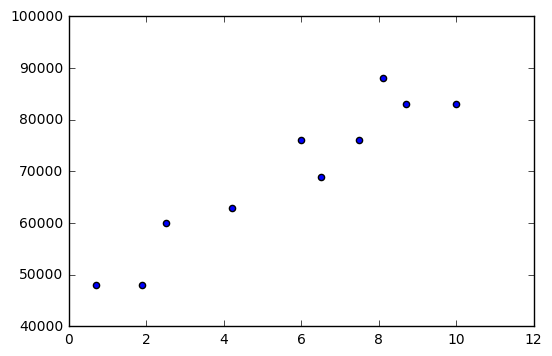

In [9]:
# 연봉과 근속 기간이 연 단위로 표기된 데이터
salaries_and_tenures = [
    (83000, 8.7), (88000, 8.1),
    (48000, 0.7), (76000, 6),
    (69000, 6.5), (76000, 7.5),
    (60000, 2.5), (83000, 10),
    (48000, 1.9), (63000, 4.2)
]

x_list = []
y_list = []

for y, x in salaries_and_tenures:
    x_list.append(x)
    y_list.append(y)

from matplotlib import pyplot as plt
plt.scatter(x_list, y_list)
plt.show()

- 더 많은 경력을 가진 사람이 더 높은 연봉을 받는다는 결과를 얻었다.
- 더 흥미로운 결과는 없을까? 근속 연수에 따라 평균 연봉이 어떻게 달라지는지 살펴볼자.

In [10]:
# key는 근속 년수, value는 해당 근속 년수에 대한 연봉 목록
salary_by_tenure = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    salary_by_tenure[tenure].append(salary)
    
# key는 근속 년수, value는 해당 근속 년수의 평균 연봉
average_salary_by_tenure = {
    tenure: sum(salaries) / len(salaries)
    for tenure, salaries in salary_by_tenure.items()
}

average_salary_by_tenure

{0.7: 48000.0,
 1.9: 48000.0,
 2.5: 60000.0,
 4.2: 63000.0,
 6: 76000.0,
 6.5: 69000.0,
 7.5: 76000.0,
 8.1: 88000.0,
 8.7: 83000.0,
 10: 83000.0}

- 근속 연수가 같은 사람이 없어서, 사용자 개개인의 연봉을 보여주는 것과 크게 다르지 않다.
- 구간을 나누어 보자

In [11]:
def tenure_bucket(tenure):
    if tenure < 2:
        return "less than two"
    elif tenure < 5:
        return "between two and five"
    else:
        return "more than five"
    
# 각 연봉을 해당 구간에 대응시켜 보자.
# key는 근속 년수 구간, value는 해당 구간에 속하는 사용자들의 연봉
salary_by_tenure_bucket = defaultdict(list)
for salary, tenure in salaries_and_tenures:
    bucket = tenure_bucket(tenure)
    salary_by_tenure_bucket[bucket].append(salary)
    
# 각 구간의 연봉을 구해보자.
# key는 근속 년수 구간, value는 해당 구간에 속하는 사용자들의 편균 연봉
average_salary_by_bucket = {
    tenure_bucket: sum(salaries) / len(salaries)
    for tenure_bucket, salaries in salary_by_tenure_bucket.iteritems()
}
average_salary_by_bucket

{'between two and five': 61500.0,
 'less than two': 48000.0,
 'more than five': 79166.66666666667}

# 4. 유료 계정으로 전환하는 사용자

- 다음과 같이 서비스를 사용한 근속 년수와 유료 계정 사용 여부가 있다고 가정하자.
 - 0.7 paid
 - 1.9 unpaid
 - 2.5 paid
 - 4.2 unpaid
 - 6 unpaid
 - 6.5 unpaid
 - 7.5 unpaid
 - 8.1 unpaid
 - 8.7 paid
 - 10 paid
- 근속 년수가 매우 짧거나 아주 긴 경우에는 유료 계정을 사용하는 경향이 있고, 근속 년수가 평균치 내외인 경우에는 그렇지 않은 경향이 있다.
- 이를 바탕을 간단한 유료 계정 사용 여부를 예측할 수 있는 간단한 모델을 만들 수 있다.

In [12]:
def predict_paid_or_unpaid(years_experience):
    if years_experience < 3.0:
        return "paid"
    elif years_experience < 8.5:
        return "unpaid"
    else:
        return "paid"

# 5. 데이터 과학자들이 가장 관심있어 하는 관심사는?
### 가장 많은 빈도수를 가진 관심 주제를 찾는다. (굉장히 Naive한 방법)

In [13]:
# 1. 모든 관심사를 소문자로 변환하고 단어 기준으로 쪼갠다.
words_and_counts = Counter(word
                          for user, interest in interests
                          for word in interest.lower().split())

#2. 각 단어의 수를 센다.
for word, count in words_and_counts.most_common():
    if count > 1:
        print word, count

learning 3
java 3
python 3
big 3
data 3
hbase 2
regression 2
cassandra 2
statistics 2
probability 2
hadoop 2
networks 2
machine 2
neural 2
scikit-learn 2
r 2
